In [ ]:
import pandas as pd 
import numpy as np 

datafolder = '/Users/jeffreychen/DatathonData/Datathon Materials/Datasets/'

listing_data = pd.read_csv(datafolder + 'listings.csv')
listingcln = pd.read_csv(datafolder + 'listings_cleaned.csv')
#listing_south = pd.read_csv(datafolder +'us_south_listings_multi_label.csv')


In [ ]:
reviews_austin = pd.read_csv(datafolder + 'reviews_austin.csv.gz')
reviews_ash = pd.read_csv(datafolder + 'reviews_asheville.csv.gz')
reviews_new_orl = pd.read_csv(datafolder + 'reviews_new_orlaeans.csv.gz')

In [ ]:
reviews_austin

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2265,963,2009-03-17,7538,Niall,I stayed here during SXSW and had a really ple...
1,2265,1057,2009-03-22,10029,Michael,"Great place, close enough to everything downto..."
2,2265,200418,2011-03-16,61677,Gustaf,We had a great time in Austin staying at Paddy...
3,2265,1001630,2012-03-15,1523753,Noah,We had a great stay at Zen East for South By S...
4,2265,1016390,2012-03-19,1547660,Melissa,I arrived late in the evening so did not meet ...
...,...,...,...,...,...,...
328301,49154238,749873952,2021-04-18,296434800,Matthew,Beautiful space and comfortable sleeping arran...
328302,49157840,748925901,2021-04-15,71273974,Ryan,This place is amazing! It’s big and open. All ...
328303,49211498,749882156,2021-04-18,338354956,Erendida,Kenny’s place was truly magical. It exceeded o...
328304,49214303,749939702,2021-04-18,397056067,Alyssa,Super cute and clean apartment! Was perfect fo...


In [ ]:
# listingcln['listing_id'] = listing_south['id']
# listingcln['state'] = listing_south['state']
# listingcln

In [ ]:
# listingcln_tx = listingcln[listingcln['state'] == 'TX'].sort_values('listing_id').reset_index(drop=True).copy()
# listingcln_tx = listingcln_tx.drop(listingcln_tx.columns[0], axis=1)


In [ ]:
# tx_id_list = listingcln_tx['listing_id'].unique()
# len(tx_id_list)

5942

In [ ]:
def cln_df(df):
    df['date'] = pd.to_datetime(df['date'])
    df['comments'] = df['comments'].astype(str)
    time_mask = (df['date'] < '2019') & (df['date'] > '2015')
    df = df.loc[time_mask].reset_index(drop=True)
    df = df[['listing_id','date','comments']]
    return df 

reviews_austin = cln_df(reviews_austin)
reviews_ash = cln_df(reviews_ash)
reviews_new_orl = cln_df(reviews_new_orl)


# reviews_austin['date'] = pd.to_datetime(reviews_austin['date'])
# time_mask = (reviews_austin['date'] < '2018') & (reviews_austin['date'] > '2015')
# reviews_austin = reviews_austin.loc[time_mask].reset_index(drop=True)
# reviews_austin = reviews_austin[['listing_id','date','comments']]
# reviews_austin['comments'] = reviews_austin['comments'].astype(str)
# reviews_austin

# reviews_austin['date'] = pd.to_datetime(reviews_austin['date'])
# time_mask = (reviews_austin['date'] < '2019') & (reviews_austin['date'] > '2015')
# reviews_austin = reviews_austin.loc[time_mask].reset_index(drop=True)
# reviews_austin = reviews_austin[['listing_id','date','comments']]
# reviews_austin['comments'] = reviews_austin['comments'].astype(str)
# reviews_austin

In [ ]:
ttl_reviews = pd.concat([reviews_austin, reviews_ash, reviews_new_orl], axis=0)
ttl_reviews

,listing_id,date,comments
0,2265,2015-05-24,Paddy was extremely responsive and accommodati...
1,2265,2015-10-04,Paddy was helpful with orientation and warning...
2,2265,2015-10-12,We stayed at Paddy's for ACL and it couldn't h...
3,2265,2015-11-09,"We loved staying at Paddy's peaceful, charming..."
4,2265,2016-02-14,Great place- close to 6th street. Host was gen...
...,...,...,...
140836,30955607,2018-12-30,Vickel offered amazing hospitality and helped ...
140837,30965561,2018-12-28,"Kevin’s home was perfect, felt like we were “h..."
140838,31057020,2018-12-28,Place was amazing and very central to tourism!...
140839,31120119,2018-12-29,Location is amazing and the apartment is great...


In [ ]:
south = ["OK", "TX", "LA", "AR", "TN", "MS", "AL", "GA", "WV", "NC", "SC", "FL", "KY", "VA"]
#len(listings[(listings.state.isin(south))].host_id.unique())
listings_south = listing_data[(listing_data.review_scores_rating.fillna(0) > 0) & (listing_data.state.isin(south))].reset_index()
# (listings_id)
south_ids = listings_south['id']

In [ ]:
 all_reviews = ttl_reviews[ttl_reviews['listing_id'].isin(south_ids)]
 all_reviews

,listing_id,date,comments
0,2265,2015-05-24,Paddy was extremely responsive and accommodati...
1,2265,2015-10-04,Paddy was helpful with orientation and warning...
2,2265,2015-10-12,We stayed at Paddy's for ACL and it couldn't h...
3,2265,2015-11-09,"We loved staying at Paddy's peaceful, charming..."
4,2265,2016-02-14,Great place- close to 6th street. Host was gen...
...,...,...,...
109626,18809744,2018-12-03,Greg was thoughtful and went above and beyond ...
109627,18809744,2018-12-11,This is surely one of the best value 2-bedroom...
109628,18809744,2018-12-17,Greg was an outstanding host! He went above an...
109629,18809744,2018-12-22,Perfect shotgun home with great accommodations...


In [ ]:
all_reviews = all_reviews.groupby('listing_id')['comments'].apply(lambda x: "%s" % ','.join(x))
all_reviews = pd.DataFrame(all_reviews)

In [ ]:
all_reviews

,comments
listing_id,
2265,Paddy was extremely responsive and accommodati...
5245,I had a great time staying with Paddy. She is ...
5456,Pretty apartment that was the perfect location...
5769,Awesome hosts. Very friendly. The house is loc...
6413,"Todd and Amy were fantastic hosts, and we had ..."
...,...
18464475,Charles place was nice and cozy. It was perfec...
18474592,"Modern, clean property within walking distance..."
18684927,This place is super convenience and totally wo...


In [ ]:
all_reviews.to_csv('all_reviews.csv')

In [ ]:
# Packages
import nltk
import os
import pandas            as pd
import pysentiment2      as ps
from nltk.tokenize    import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus      import stopwords

nltk.download('punkt')
nltk.download('stopwords')

def create_df(dataset):
    stop_words = set(stopwords.words('english'))
    lm         = ps.LM()
    #dataset    = dataset.drop(columns=[lables])
    dataset.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
    additional_stopwords = ['say','veri','wa','u','hi','ha','us','would','th','thi','also','and','hous']
    cities_stopwords = ['austin','orleans','asheville']
    stop_words.update(additional_stopwords)
    stop_words.update(cities_stopwords)
    
    for col in dataset.columns:
        dataset[col] = dataset[col].str.lower()
        #dataset[col] = dataset[col].str.replace('b ','')
    headlines  = []
    head_clean = []
    sentscore  = []
    porter = PorterStemmer()

    for row in range(len(dataset.index)):
        document = ' '.join(str(x) for x in dataset.iloc[row, 0:25])
        headlines.append(document)
        tokens  =  word_tokenize(document)
        stemmed = [porter.stem(word) for word in tokens]
        words   = [w for w in stemmed if not w in stop_words]
        head_clean.append(' '.join(word for word in words))
        tokens  = lm.tokenize(' '.join(word for word in words))
        sentscore.append(lm.get_score(tokens)['Polarity'])
    df              = pd.DataFrame(headlines, columns=['All'])
    df['processed'] = head_clean
    df['score']     = sentscore
    # data is the dataset after filling NaNs defined out of the function scope
    #df['label'] = dataset.label 
    #df['date']  = dataset.date
    
    entire_processed_text = ' '.join(doc for doc in head_clean)
    #lables.append('ALL','processed','score')
    return df, entire_processed_text

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jeffreychen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeffreychen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_full_all, entire_txt_all = create_df(all_reviews)

In [ ]:
df_full_all['listing_id'] = all_reviews.index
df_full_all

,All,processed,score,listing_id
0,paddy was extremely responsive and accommodati...,paddi extrem respons accommod definit stay pad...,0.680000,2265
1,i had a great time staying with paddy she is ...,great time stay paddi love person wonder airbn...,-0.333333,5245
2,pretty apartment that was the perfect location...,pretti apart perfect locat explor conveni loca...,0.706601,5456
3,awesome hosts very friendly the house is loc...,awesom host friendli locat good neighborhood p...,0.737705,5769
4,todd and amy were fantastic hosts and we had ...,todd ami fantast host wonder experi stay river...,0.772727,6413
...,...,...,...,...
3316,charles place was nice and cozy it was perfec...,charl place nice cozi perfect wife onli min fr...,0.538462,18464475
3317,modern clean property within walking distance...,modern clean properti within walk distanc jazz...,0.614350,18474592
3318,this place is super convenience and totally wo...,place super conveni total worth origin thought...,0.620690,18684927
3319,great price super close to public transportat...,great price super close public transport easil...,0.578947,18755643


In [ ]:
entire_txt_all

everyth wonder place stay like hotel without hefti price tag thank get place stay paul get pool nice touch enough quiet rest step away fun walk distanc street car drug store need must tri rubi slipper oceania comfort littl place insid quarter definit stay locat french quarter awesom close everyth room love pool courtyard serious piec heaven enjoy come downstair morn get cup coffe sit beauti courtyard chat guest love littl kitchen fridg enough good thing feel like found go home away home new orlean paul fantast host susi fantast insight set tour recommend see whitney plantat sheer perfect thank super emplac proch du quartier francai au calm pa de bruit la chambr tait spacieus avec une petit cuisin four et frigo plaqu de cuisson cafetier la piscin est en plu get entir bedroom plu live room area small kitchen locat excel definit stay come back great locat everyth describ good qualiti price ratio cozi warm place stay authent old town atmospher quiet well run two secur gate allow access ill

In [ ]:
import os
# os.mkdir('/Users/jeffreychen/DatathonData/Datathon Materials/Datasets/corpus/austin_corpus')
os.chdir('/Users/jeffreychen/DatathonData/Datathon Materials/Datasets/corpus/all_corpus')
for ind in range(len(df_full_all)):
    file_id = df_full_all.listing_id[ind].astype(str)
    with open('file_'+file_id+'.txt','w') as fout:
        fout.write(df_full_all.processed[ind])
        fout.close()

In [ ]:
os.chdir('/Users/jeffreychen/Desktop/Datathon/')

In [ ]:
import nltk
import os
from sklearn.metrics import mean_squared_error as mse 
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords, PlaintextCorpusReader
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing

def dtm_from_corpus(xCorpus):
    fd_list = []
    for x in range(0, len(xCorpus.fileids())):
        fd_list.append(nltk.FreqDist(xCorpus.words(xCorpus.fileids()[x])))
    dtm = pd.DataFrame(fd_list, index = xCorpus.fileids()[0:])
    dtm.fillna(0, inplace = True)
    return dtm

In [ ]:
newcorpus = PlaintextCorpusReader('/Users/jeffreychen/DatathonData/Datathon Materials/Datasets/corpus/all_corpus', ".*")

In [ ]:
dtm_All = dtm_from_corpus(newcorpus)

In [ ]:
dtm_All['id']

file_1001303.txt     0.0
file_10016395.txt    0.0
file_10034909.txt    0.0
file_10041820.txt    0.0
file_10059847.txt    0.0
                    ... 
file_996332.txt      0.0
file_9979215.txt     0.0
file_9988675.txt     0.0
file_999823.txt      0.0
file_9999670.txt     0.0
Name: id, Length: 3321, dtype: float64

In [ ]:
dtm_all_cln = dtm_All.reset_index().drop('id',axis=1).rename(columns={'level_0':'id'})
dtm_all_cln['id'] =dtm_all_cln['id'].str.extract('(\d+)')
dtm_all_cln

,id,gorgeou,home,reason,price,friend,look,place,stay,ut,...,polymnia,layfett,stadtteil,angebunden,sischen,frischmarkt,bekommt,thebe,colbert,racism
0,1001303,4.0,18.0,1.0,1.0,3.0,5.0,16.0,33.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10016395,2.0,18.0,1.0,2.0,2.0,0.0,42.0,34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10034909,0.0,5.0,0.0,3.0,3.0,3.0,45.0,34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10041820,0.0,6.0,0.0,0.0,2.0,1.0,37.0,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10059847,0.0,10.0,2.0,2.0,2.0,4.0,17.0,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,996332,11.0,107.0,0.0,1.0,2.0,9.0,78.0,123.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3317,9979215,0.0,0.0,2.0,2.0,2.0,2.0,14.0,28.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3318,9988675,0.0,2.0,1.0,1.0,2.0,4.0,30.0,22.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3319,999823,0.0,34.0,3.0,1.0,7.0,14.0,97.0,127.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#dtm_all_cln.to_csv('dtm_all.csv', index=False)

In [ ]:
dtm_All.sum()

gorgeou         3633.0
home           51536.0
reason          1906.0
price           4402.0
friend         10669.0
                ...   
frischmarkt        1.0
bekommt            1.0
thebe              1.0
colbert            1.0
racism             1.0
Length: 33157, dtype: float64

In [ ]:
s_words = stopwords.words('english')
additional_stopwords = ['say','veri','wa','u','hi','ha','us','would','th','thi','also','and','hous']
cities_stopwords = ['austin','orleans','asheville']
s_words.extend(additional_stopwords)
s_words.extend(cities_stopwords)

def word_frequency(sentence, stopwords):
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in s_words]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    lemmatizer = [lemmatizer.lemmatize(t) for t in new_tokens]
    counted = Counter(new_tokens)
    counted2 = Counter(ngrams(new_tokens, 2))
    counted3 = Counter(ngrams(new_tokens, 3))
    word_freq = pd.DataFrame(
        counted.items(), 
        columns=['word', 'frequency']).sort_values(by='frequency', ascending = False)
    word_pairs = pd.DataFrame(
        counted2.items(), 
        columns=['word', 'frequency']).sort_values(by='frequency', ascending = False)
    word_trigrams = pd.DataFrame(
        counted3.items(), 
        columns=['word', 'frequency']).sort_values(by='frequency', ascending = False)
    return word_freq, word_pairs, word_trigrams


In [ ]:
freq1, freq2, freq3  = word_frequency(entire_txt_tx, s_words)

In [ ]:
freq1.head(3)

,word,frequency
32,great,159567
5,stay,157562
51,place,137534
183,locat,93576
53,host,66614


<AxesSubplot:xlabel='frequency', ylabel='word'>

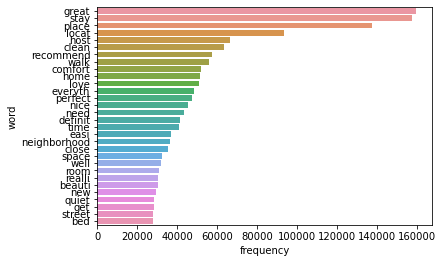

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
freq_doc1 = freq1[freq1.frequency >= 1500]
ax1 = plt.figure()
sns.barplot(x='frequency', y='word', data=freq_doc1.head(30))

<AxesSubplot:xlabel='frequency', ylabel='word'>

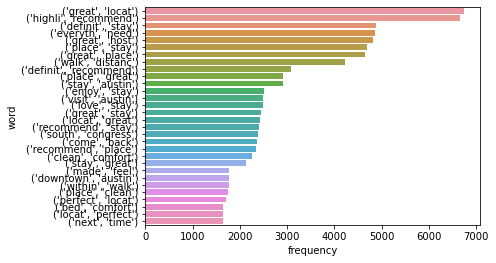

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
freq_doc2 = freq2[freq2.frequency >= 1500]
ax2 = plt.figure()
sns.barplot(x='frequency', y='word', data=freq_doc2.head(30))

<AxesSubplot:xlabel='frequency', ylabel='word'>

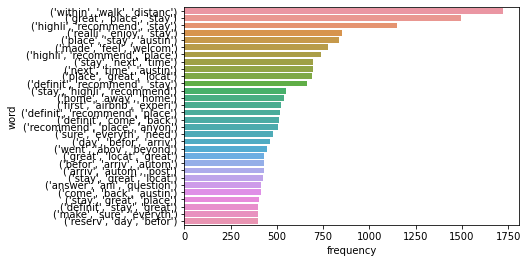

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
freq_doc3 = freq3[freq3.frequency>=10]
ax3 = plt.figure()
sns.barplot(x='frequency', y='word', data=freq_doc3.head(30))

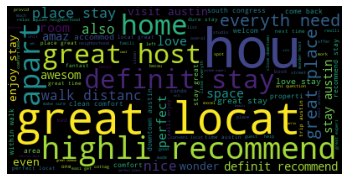

In [ ]:
wc_Tx = WordCloud(max_words=100, stopwords=s_words).generate_from_text(entire_txt_tx)

plt.figure()
plt.imshow(wc_Tx)
plt.axis('off')
plt.show()

<h2> Starting to Create Sentiment Score, mapping to signal, reveiw expectations

In [ ]:
tdm_All = dtm_All.T

In [ ]:
tdm_All = dtm_All.T
good_topics_words = ['stay','host','place','quarter', 'french','walk','locat','restaurant','space']
good_prob_w = {
    'stay':0.040,
    'host':0.029,
    'place':0.043,
    'quarter':0.051,
    'french':0.047,
    'walk':0.038,
    'locat':0.019,
    'restaurant':0.016,
    'space':0.015,
}
# good_topics_words = ['great','place','stay','clean', 'friendli','comfort','home','beautiful','wonderful','love','recommend','perfect']

# good_prob_w = {
#     'great':0.030,
#     'place':0.284,
#     'stay':0.022,
#     'clean':0.027,
#     'friendli':0.026,
#     'comfort':0.019,
#     'home':0.043,
#     'beautiful':0.026,
#     'love':0.018,
#     'wonderful':0.017,
#     'recommend':0.011,
#     'perfect':0.013
# }
for gw in good_topics_words:
    tdm_All.loc[gw] = tdm_All.loc[gw]*good_prob_w[gw]
good_common_words = ['great','clean','comfort','welcom','beautiful','privat','nice','love','perfect','home'] #highli, locat
good_recommed_words = good_topics_words + good_common_words

print(dtm_All[good_recommed_words].sum())
positive_feedback_expectation = tdm_All.loc[good_recommed_words].sum()
positive_feedback_expectation

stay          7.608790e-12
host          1.931806e+03
place         7.107937e-02
quarter       1.290402e+03
french        1.081564e+03
walk          2.114662e+03
locat         1.777944e+03
restaurant    4.640000e-01
space         4.876050e+02
great         3.140757e-09
clean         4.846906e-10
comfort       1.672845e-11
welcom        1.989000e+04
beautiful     6.515404e-14
privat        9.728000e+03
nice          4.525900e+04
love          5.595054e-10
perfect       3.850167e-11
home          6.023631e-07
dtype: float64


file_1001303.txt      6.598008
file_10016395.txt    21.645022
file_10034909.txt    20.020023
file_10041820.txt    20.425019
file_10059847.txt     7.989009
                       ...    
file_996332.txt      64.085040
file_9979215.txt     18.542007
file_9988675.txt      5.094016
file_999823.txt      75.889050
file_9999670.txt     50.662051
Length: 3321, dtype: float64

In [ ]:
tdm_All = dtm_All.T.copy()
bad_topics_words = ['reserv','cancel','autom','phone', 'rent','never','stress','still','overpric','toilet','paper','cold','bit','still','compar']



bad_prob_w = {
    'reserv':0.04,
    'cancel':0.04,
    'autom':0.03,
    'phone':0.039,
    'rent':0.023,
    'never':0.016,
    'stress':0.030,
    'still':2,
    'overpric':0.012,
    'toilet':0.012,
    'paper':0.012,
    'cold':0.012,
    'bit':0.012,
    'still':0.017,
    'compar':0.017
}
for bw in bad_topics_words:
    tdm_All.loc[bw] = tdm_All.loc[bw]*bad_prob_w[bw]
bad_common_words = ['bad','lie','pressur','need','wonder','could', 'quit','rude', 'unfortun','expens','cheaper','overpric','suggest'] #close


bad_recommed_words = bad_topics_words + bad_common_words
print(dtm_All[bad_recommed_words].sum())
#tdm_All.loc['bad']*bad_prob_w['bad']

negative_feedback_expectation = tdm_All.loc[bad_recommed_words].sum()
negative_feedback_expectation


reserv       2308.0
cancel       1605.0
autom        1094.0
phone        1398.0
rent         4094.0
never        5763.0
stress        484.0
still        4758.0
overpric        1.0
toilet        909.0
paper         793.0
cold         2254.0
bit          6373.0
still        4758.0
compar        445.0
bad          1539.0
lie           118.0
pressur       942.0
need        43441.0
wonder      26407.0
could       17723.0
quit         5043.0
rude           66.0
unfortun     1117.0
expens        511.0
cheaper       209.0
overpric        1.0
suggest      7376.0
dtype: float64


file_1001303.txt     11.032000
file_10016395.txt    24.093156
file_10034909.txt    20.410578
file_10041820.txt    18.401000
file_10059847.txt    17.158000
                       ...    
file_996332.txt      82.256734
file_9979215.txt      7.086578
file_9988675.txt      5.104000
file_999823.txt      79.330890
file_9999670.txt     73.167312
Length: 3321, dtype: float64

In [ ]:
feedback_score = pd.DataFrame(((positive_feedback_expectation)/(positive_feedback_expectation + negative_feedback_expectation )), columns=['feedback_score'])
feedback_score.describe()

,feedback_score
count,3315.000000
mean,0.469957
std,0.196752
min,0.000000
25%,0.364656
50%,0.449426
75%,0.536491
max,1.000000


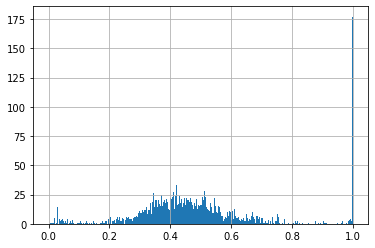

In [ ]:
#feedback_score.replace([np.inf, -np.inf], np.nan, inplace=True)

ax =feedback_score['feedback_score'].hist(bins=500)
#ax = s.hist()  # s is an instance of Series
fig = ax.get_figure()
fig.savefig('index_dist.svg')

In [ ]:
mu = feedback_score['feedback_score'].mean()
sd = feedback_score['feedback_score'].std()
print(mu, sd)
feedback_score['normalized_fbs'] = (feedback_score['feedback_score'] - mu)/sd

0.40236846033857554 0.1566810122024938


<AxesSubplot:>

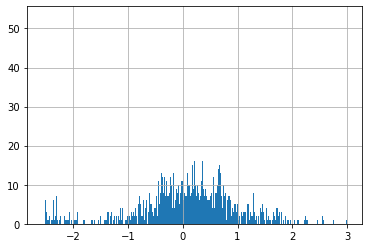

In [ ]:
feedback_score['normalized_fbs'].hist(bins=1000)

In [ ]:
feedback_score = feedback_score.reset_index().rename(columns={'index':'id'})
feedback_score['id'] = feedback_score.id.str.extract('(\d+)')
feedback_score


,id,feedback_score,normalized_fbs
0,1001303,0.354160,-0.307684
1,10016395,0.463112,0.387691
2,10034909,0.483218,0.516015
3,10041820,0.512856,0.705176
4,10059847,0.305542,-0.617985
...,...,...,...
3316,996332,0.434941,0.207893
3317,9979215,0.696320,1.876112
3318,9988675,0.454903,0.335299
3319,999823,0.485783,0.532387


In [ ]:
feedback_score.to_csv('feedback_score_3.csv')

Look into poor ratin

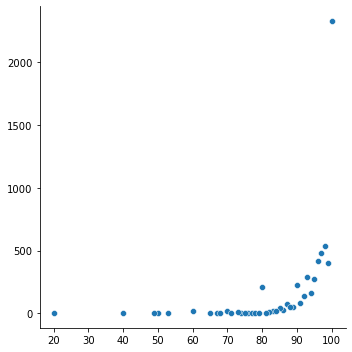

In [ ]:
#rating_count = (Counter(listingcln_tx['review_scores_rating']).most_common())
labels, values = zip(*Counter(listingcln_tx['review_scores_rating']).items())

indexes = np.arange(len(labels))

sns.relplot(x=labels, y=values)

In [ ]:
len(listingcln[listingcln['review_scores_rating'] <= 75])

170

In [ ]:
poorrating = listingcln.loc[listingcln['review_scores_rating'] <= 75].copy().reset_index(drop=True)

In [ ]:
poorrating_id = poorrating['listing_id']

In [ ]:
 reviews_poorrating_Tx = reviews_austin[reviews_austin['listing_id'].isin(poorrating_id)]
 reviews_poorrating_Tx

,listing_id,date,comments
32000,4495324,2016-03-15,"This house was very spacious, it had a great d..."
32001,4495324,2017-02-22,The host canceled this reservation 17 days bef...
32002,4495324,2017-03-16,We stayed here during SXSW and it was wonderfu...
32003,4495324,2017-11-28,The host canceled this reservation 7 days befo...
32029,4516994,2015-01-11,Katharine and Jes have a pretty cozy place tha...
...,...,...,...
70635,16869933,2017-12-04,"This is a nice, cozy space in a great location..."
70636,16869933,2017-12-10,"Pros: The place is clean, centrally located, a..."
70637,16869933,2017-12-18,"This was my first Airbnb rental, and I was ver..."
70638,16869933,2017-12-26,Amazing place in Austin


In [ ]:
reviews_poorrating_Tx = reviews_poorrating_Tx.groupby('listing_id')['comments'].apply(lambda x: "%s" % ','.join(x))
reviews_poorrating_Tx = pd.DataFrame(reviews_poorrating_Tx)
reviews_poorrating_Tx

,comments
listing_id,
4495324,"This house was very spacious, it had a great d..."
4516994,Katharine and Jes have a pretty cozy place tha...
5430429,Melissa is an excellent host. She was very fri...
5768194,Phil the host was the best host I could have a...
9684896,The area is about 15 minutes drive from downto...
11377313,"The neighborhood was nice and quiet, although ..."
11413937,Parker was very easy to communicate with via t...
11519361,It was awesome. Very flexible. This was amazin...
11670278,Just surreal \nWhen my reservation was accepte...


In [ ]:
df_full_pr_tx, entire_txt_pr_tx = create_df(reviews_poorrating_Tx)

In [ ]:
freq1pr, freq2pr, freq3pr  = word_frequency(entire_txt_pr_tx, s_words)

<AxesSubplot:xlabel='frequency', ylabel='word'>

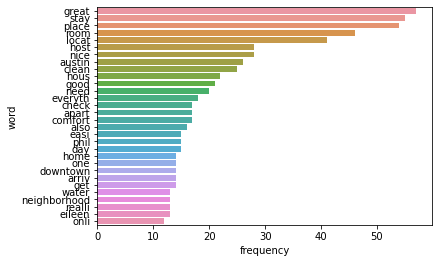

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
#freq_pr1 = freq1pr[freq1pr.frequency]
ax11 = plt.figure()
sns.barplot(x='frequency', y='word', data=freq1pr.head(30))

<AxesSubplot:xlabel='frequency', ylabel='word'>

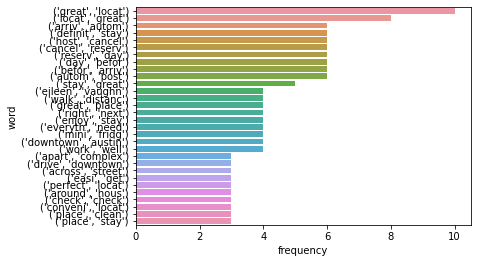

In [ ]:
ax22 = plt.figure()
sns.barplot(x='frequency', y='word', data=freq2pr.head(30))

<AxesSubplot:xlabel='frequency', ylabel='word'>

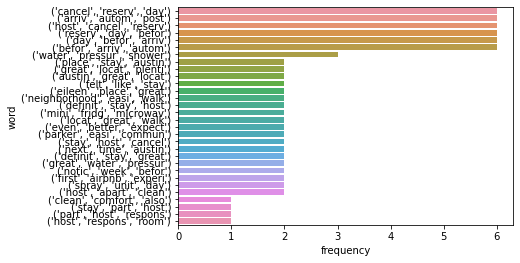

In [ ]:
ax22 = plt.figure()
sns.barplot(x='frequency', y='word', data=freq3pr.head(30))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8e6d3dd7-a3ce-422e-8f25-57163d804f84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>